ПОДГОТОВКА К ЧТЕНИЮ ДАННЫХ

Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np 
import missingno as msno
    # это Python-библиотека, которая предоставляет удобные инструменты для визуализации пропущенных значений в наборах данных. 

    # 1. **Matrix Plot**: Отображение пропусков в наборе данных в виде матрицы, помогая визуально обнаружить закономерности и корреляции.
    # 2. **Bar Plot**: Построение столбчатой диаграммы, показывающей долю пропусков для каждого признака.
    # 3. **Heatmap**: Визуализация корреляций между признаками с учетом пропущенных значений.
    # 4. **Dendrogram**: Построение дендрограммы, отображающей иерархическую структуру признаков с пропусками.
    # 5. **Violin Plot**: Визуализация распределения пропусков для каждого признака.
    # 6. **Countplot**: Построение диаграммы, показывающей количество пропусков на каждую категорию признака.

import seaborn as sns
    # на предоставляет высокоуровневые функции для создания красивых и информативных статистических графиков.

    # 1. **Графики для одномерных данных**:
    # - Гистограммы
    # - Графики плотности
    # - Графики распределения
    # 2. **Графики для двумерных данных**:
    # - Точечные графики
    # - Графики рассеивания
    # - Графики вероятностных распределений
    # 3. **Графики для многомерных данных**:
    # - Графики корреляции
    # - Тепловые карты
    # - Графики кластеров
    # 4. **Графики для временных рядов**:
    # - Графики линий
    # - Графики полос
    # - Графики полос с оттенками
    # 5. **Графики для категориальных данных**:
    # - Графики коробок
    # - Графики усов
    # - Графики полос
    # 6. **Дополнительные возможности**:
    # - Настройка стиля графиков
    # - Интеграция с `pandas` для работы с данными
    # - Поддержка высокого разрешения (HiDPI) и экспорта в различные форматы

import matplotlib.pyplot as plt 
from scipy.stats import mannwhitneyu 
    # это модуль библиотеки SciPy, который предоставляет широкий спектр функций для работы с вероятностными распределениями и статистическим анализом данных

    # 1. **Распределения вероятностей**: Модуль включает в себя большое количество различных вероятностных распределений, таких как нормальное, пуассоновское, биномиальное, экспоненциальное и многие другие. Для каждого распределения предоставляются функции для вычисления плотности вероятности, кумулятивной функции распределения, обратной кумулятивной функции и генерации случайных чисел.
    # 2. **Статистические тесты**: `scipy.stats` содержит множество статистических тестов, включая t-test, ANOVA, хи-квадрат, Манна-Уитни, Вилкоксона и другие.
    # 3. **Описательная статистика**: Модуль предоставляет функции для вычисления основных статистических показателей, таких как среднее, медиана, стандартное отклонение, коэффициент корреляции и т.д.
    # 4. **Моделирование и оценка параметров**: `scipy.stats` позволяет оценивать параметры вероятностных моделей, используя различные методы, например, максимального правдоподобия.
    # 5. **Многомерная статистика**: Модуль включает функции для работы с многомерными распределениями, такими как многомерное нормальное распределение.

from sklearn.neighbors import KNeighborsClassifier 
    # это модуль в библиотеке scikit-learn (sklearn) на Python, который предоставляет инструменты для работы с алгоритмами ближайших соседей.
    # Эти алгоритмы широко используются в различных задачах машинного обучения, таких как классификация, регрессия, обнаружение аномалий и снижение размерности.

from sklearn.ensemble import RandomForestClassifier
    # является модулем в библиотеке Scikit-learn (скрипт-bib), который предоставляет различные методы ансамблевого обучения в машинном обучении, то есть соединить несколько методов для более точного прогнозирования и вычисления
from sklearn.ensemble import GradientBoostingClassifier

    # -------------------
    # СЧИТЫВАЕМ ДОКУМЕНТ
    # -------------------

df = pd.read_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\supermarket\\supermarket_sales_sheet1.csv')

    # ------------------------
    # выявляем пустые значения
    # ------------------------

df.head(5)


In [34]:
import pandas as pd
import numpy as np 
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt 


df = pd.read_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\supermarket\\supermarket_sales_sheet1.csv')

df.drop(columns=['Invoice ID', 'Branch']).head(5)
    # удалил ненужные колонки, для упрощения анализа

df.groupby('Gender')['Invoice ID'].count()
    # Gender
    # Female    501
    # Male      499

df.groupby('City')['Invoice ID'].count()
    # City
    # Mandalay     332
    # Naypyitaw    328
    # Yangon       340

df.groupby('Payment')['Invoice ID'].count()
    # получаем общее количество заказов
    # Payment
    # Cash           344
    # Credit card    311
    # Ewallet        345

df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [ ]:
import pandas as pd
import numpy as np 
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu 


df = pd.read_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\supermarket\\supermarket_sales_sheet1.csv')

df.columns.name = 'Index'
rdf = df.rename(columns={"Tax 5%": "Tax"}).head()
rdf.Tax.describe()
    # count     5.000000
    # mean     19.934700
    # std      10.354177
    # min       3.820000
    # 25%      16.215500
    # 50%      23.288000
    # 75%      26.141500
    # max      30.208500

df.Total.describe()
    # count    1000.000000
    # mean      322.966749
    # std       245.885335
    # min        10.678500
    # 25%       124.422375
    # 50%       253.848000
    # 75%       471.350250
    # max      1042.650000

df.Quantity.describe()
    # count    1000.000000
    # mean        5.510000
    # std         2.923431
    # min         1.000000
    # 25%         3.000000
    # 50%         5.000000
    # 75%         8.000000
    # max        10.000000

df.cogs.describe()
    # count    1000.00000
    # mean      307.58738
    # std       234.17651
    # min        10.17000
    # 25%       118.49750
    # 50%       241.76000
    # 75%       448.90500
    # max       993.00000

gdf = df.rename(columns={"gross margin percentage": "gmp", "gross income": "gi"}).head()
gdf.gmp.describe()
    # count    5.000000
    # mean     4.761905
    # std      0.000000
    # min      4.761905
    # 25%      4.761905
    # 50%      4.761905
    # 75%      4.761905
    # max      4.761905

gdf.gi.describe()
    # count     5.000000
    # mean     19.934700
    # std      10.354177
    # min       3.820000
    # 25%      16.215500
    # 50%      23.288000
    # 75%      26.141500
    # max      30.208500

df.Rating.describe()
    # count    1000.00000
    # mean        6.97270
    # std         1.71858
    # min         4.00000
    # 25%         5.50000
    # 50%         7.00000
    # 75%         8.50000
    # max        10.00000

df.groupby('Payment')['Quantity'].sum()
    # количество заказанных товаров Quantity в соответствии с различными способами оплаты
    # Payment
    # Cash           1896
    # Credit card    1722
    # Ewallet        1892

    # Первый столбец "Платежи" - это столбец, по которому вы хотите сгруппировать. Второй столбец "Количество" - это столбец, для которого вы будете выполнять агрегирующую функцию. Наконец, у вас есть агрегатная функция .sum().
    # Но с помощью agg() функции вы можете выполнять две или более агрегации одновременно.

df.groupby('Payment')['Quantity'].agg([np.sum, np.mean])
    # Так же мы можем передать список в виде словаря в столбец платежи и выполнить агрегирующую функцию по нескольким столбцам для столбца количество

df.groupby(['Payment', 'Customer type'])['Quantity'].sum()
    # Payment      Customer type
    # Cash         Member            885
    #             Normal           1011
    # Credit card  Member           1002
    #             Normal            720
    # Ewallet      Member            898
    #             Normal            994

df.groupby(['Payment', 'Customer type'])[['Quantity', 'Unit price']].sum()
    # исходя из полученных данных, мы видим что оплата через электронный кошелек приносит больше всего дохода


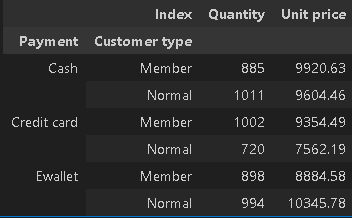